In [13]:
# Alias dictionary
alias_dict = {}
with open("rappers.txt", 'r') as file:
    for line in file:
        # Split line into primary name and aliases
        parts = line.strip().split(';')
        primary_name = parts[0].strip()  # The first part is the primary name
        aliases = [alias.strip() for alias in parts[1:]]  # The rest are aliases
        alias_dict[primary_name] = aliases

alias_dict


{'070 Shake': [],
 '2 Chainz': [],
 '21 Savage': ['Savage'],
 '50 Cent': [],
 '6ix9ine': [],
 '6lack': [],
 '88-Keys': [],
 'Ab-Soul': [],
 'A Boogie wit da Hoodie': [],
 'Abstract Rude': [],
 'Ace Hood': [],
 'Aceyalone': [],
 'Action Bronson': [],
 'Adam Saleh': [],
 'Aesop Rock': [],
 'Afrika Bambaataa': [],
 'Afroman': [],
 'Afu-Ra': [],
 'Agallah': [],
 'Ahmad': [],
 'Ajs Nigrutin': [],
 'AJ Tracey': [],
 'Akala': [],
 'Akinyele': [],
 'Akir': [],
 'Akiva Schaffer': [],
 'Akon': [],
 'Akrobatik': [],
 'Ak’Sent': [],
 'Akwid': [],
 'The Alchemist': ['Uncle Al', 'Alchemist'],
 'Alex Wiley': [],
 'Ali Jones': [],
 'Ali Vegas': [],
 'Aloe Blacc': [],
 'A.L.T.': [],
 'AMG': [],
 'Amil': [],
 'Aminé': [],
 'Amir Obè': [],
 'Ampichino': [],
 'Anderson .Paak': [],
 'Andre 3000': ['André', 'Andre', 'Andre 3K', '3 Stacks', '3K'],
 'Andre Nickatina': [],
 'Andy Mineo': [],
 'Andy Samberg': [],
 'Angel Haze': [],
 'Angie Martinez': [],
 'Anotha Level': [],
 'Ant Banks': [],
 'Anthony Parker':

In [16]:
# Letra da música como texto
import json

with open("./letras/Lyrics_Eminem.json", 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract lyrics from each song entry
lyrics_list = [song['lyrics'] for song in data['songs']]

# Combine all lyrics into a single text for processing, if needed
lyrics = " ".join(lyrics_list)

# Remove backslashes
# lyrics = lyrics.replace('\\', '')
# lyrics = lyrics.replace('\n', '\n')
# lyrics = lyrics.replace("\'", "'")

# Strip leading and trailing spaces
lyrics = lyrics.strip()

lyrics


'1977 ContributorsTranslationsРусскийPortuguêsItalianoहिन्दीDeutschFrançaisEspañolCymraegไทย / Phasa ThaiRap God Lyrics\n"Look, I was gonna go easy on you not to hurt your feelings"\n"But I\'m only going to get this one chance" (Six minutes—, six minutes—)\n"Something\'s wrong, I can feel it" (Six minutes, Slim Shady, you\'re on!)\n"Just a feeling I\'ve got, like something\'s about to happen, but I don\'t know what.\xa0\nIf that means what I think it means, we\'re in trouble, big trouble;\xa0\nAnd if he is as bananas as you say, I\'m not taking any chances"\n"You are just what the doc ordered"\n\nI\'m beginnin\' to feel like a Rap God, Rap God\nAll my people from the front to the back nod, back nod\nNow, who thinks their arms are long enough to slap box, slap box?\nThey said I rap like a robot, so call me Rap-bot\nBut for me to rap like a computer it must be in my genes\nI got a laptop in my back pocket\nMy pen\'ll go off when I half-cock it\nGot a fat knot from that rap profit\nMade a

In [17]:
# Com debug, mostra as linhas que identificou o nome de outro rapper

import re

# Convert alias mappings to a form suitable for matching. No need for lowercasing now as we match capitalized words.
alias_to_primary = {
    primary: primary for primary in alias_dict
}
for primary, alias_list in alias_dict.items():
    alias_to_primary.update({alias: primary for alias in alias_list})

# Split lyrics into lines for processing
lyrics_lines = lyrics.splitlines()

found_rappers_with_context = {}

# Check each line for rapper names
for i, line in enumerate(lyrics_lines):

    # Find capitalized words using regex
    words = re.findall(r'\b[A-Z][a-z]*\b', line)

    for word in words:
        if word in alias_to_primary:
            primary_name = alias_to_primary[word]

            # Capture 2 lines of context before and after
            context_start = max(0, i - 2)
            context_end = min(len(lyrics_lines), i + 3)
            context = "\n".join(lyrics_lines[context_start:context_end])

            if primary_name not in found_rappers_with_context:
                found_rappers_with_context[primary_name] = []

            found_rappers_with_context[primary_name].append(context)

with open('debug.json', 'w', encoding='utf-8') as f:
    json.dump(found_rappers_with_context, f, ensure_ascii=False, indent=4)

In [103]:
import re

# Convert alias mappings to a form suitable for matching.
alias_to_primary = {
    primary: primary for primary in alias_dict
}
for primary, alias_list in alias_dict.items():
    alias_to_primary.update({alias: primary for alias in alias_list})

# Split lyrics into lines for processing
lyrics_lines = lyrics.splitlines()

# Set to store unique rapper names
found_rappers = set()

# Check each line for rapper names
for line in lyrics_lines:
    # Find capitalized words using regex
    words = re.findall(r'\b[A-Z][a-z]*\b', line)

    for word in words:
        if word in alias_to_primary:
            primary_name = alias_to_primary[word]
            found_rappers.add(primary_name)

# Convert set to list
found_rappers_list = list(found_rappers)
len(found_rappers_list)


58

In [104]:
# Importando as bibliotecas necessárias
import networkx as nx
import matplotlib.pyplot as plt

# Build the graph
G = nx.DiGraph()
rapper = "Eminem"
G.add_node(rapper)

for mentioned in found_rappers:
    if mentioned != rapper:
        G.add_node(mentioned)
        G.add_edge(rapper, mentioned)

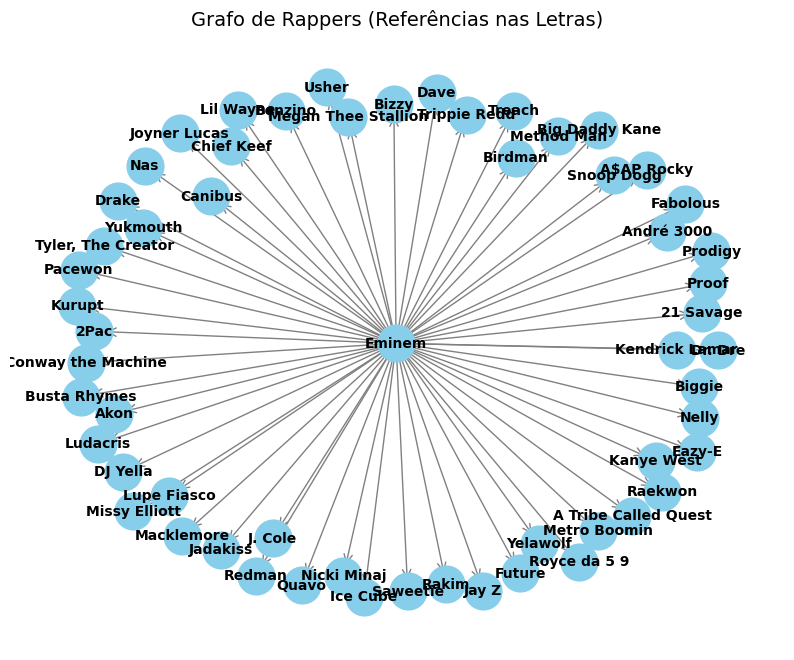

In [105]:
# Visualizando o grafo
plt.figure(figsize=(10, 8))

# Layout para o grafo
pos = nx.spring_layout(G, seed=42)  # Usando spring layout para melhor visualização

# Desenhando os nós e arestas
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

# Exibindo o grafo
plt.title("Grafo de Rappers (Referências nas Letras)", fontsize=14)
plt.axis("off")
plt.show()
